<a href="https://colab.research.google.com/github/KauaHenSilva/python_neural_networks_convolution_for_image_classification/blob/main/networks_convolution_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Extração de dados

In [35]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import zipfile
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/homer_bart_2.zip'
if not os.path.exists('homer_bart_2'):
  with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

### Adquirir valores

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

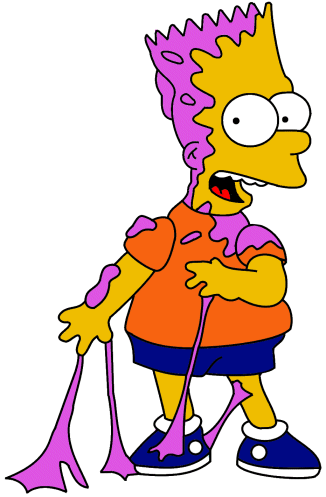

In [38]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/bart/bart1.bmp')

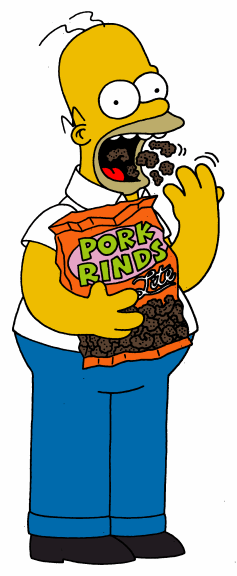

In [39]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/homer/homer1.bmp')


### Base de treinamento e teste

In [40]:
gerador_treinamento = ImageDataGenerator(rescale=(1./255),rotation_range=7, horizontal_flip=True, zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/homer_bart_2/training_set', target_size=(64,64), batch_size=8, class_mode='categorical', shuffle=True)

Found 215 images belonging to 2 classes.


In [41]:
dataset_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [42]:
gerador_test = ImageDataGenerator(rescale=(1./255))
dataset_test = gerador_test.flow_from_directory('/content/homer_bart_2/test_set', target_size=(64,64), batch_size=1, class_mode='categorical', shuffle=True)

Found 54 images belonging to 2 classes.


In [43]:
dataset_test.class_indices

{'bart': 0, 'homer': 1}

### Treinamento

In [44]:
network = Sequential()

network.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
int((1152 + 2) / 2)

577

In [46]:
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = network.fit(dataset_treinamento, epochs=50, validation_data=dataset_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.6493 - loss: 0.7134 - val_accuracy: 0.5741 - val_loss: 0.5976
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7869 - loss: 0.5194 - val_accuracy: 0.7222 - val_loss: 0.5142
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7792 - loss: 0.4790 - val_accuracy: 0.7963 - val_loss: 0.4232
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8130 - loss: 0.4461 - val_accuracy: 0.7963 - val_loss: 0.4755
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8413 - loss: 0.3722 - val_accuracy: 0.6481 - val_loss: 0.4587
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8718 - loss: 0.3232 - val_accuracy: 0.8519 - val_loss: 0.3797
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8624 - loss: 0.3208 - val_accuracy: 0.7593 - val_loss: 0.4911
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9324 - loss: 0.2355 - val_accuracy: 0.9074 - val_loss: 